In [1]:
import numpy as np

# retrive dataset from sklearn
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

In [2]:
data = np.c_[california_housing["data"], california_housing["target"]]

In [3]:
names = np.r_[california_housing["feature_names"], california_housing["target_names"]]

In [4]:
from smarty.datasets import DataSet

ds = DataSet().from_object(data, columns=names)
ds.set_target_classes("MedHouseVal")

/Users/user/Desktop/projects/ml/smarty/datasets/datasets.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  col[np.where(col=='')] = np.nan # fill empty cells


In [5]:
ds.info()


DataSet at 0x11dbeca00
	Rows: 20640
	Cols: 9

	name           	          dtype
	MedInc         	        float16
	HouseAge       	          uint8
	AveRooms       	        float16
	AveBedrms      	        float16
	Population     	         uint16
	AveOccup       	        float16
	Latitude       	        float16
	Longitude      	        float16
	MedHouseVal    	        float16



In [6]:
ds = ds.batch(32).repeat(True)

In [7]:
from smarty.models.linear import LinearRegression

lr = LinearRegression(solver="norm_eq")

lr.fit(ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 1 epochs.
Epoch 1/1
	Step 1/1 - loss: 0.5311074167886495, 



<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 645/645



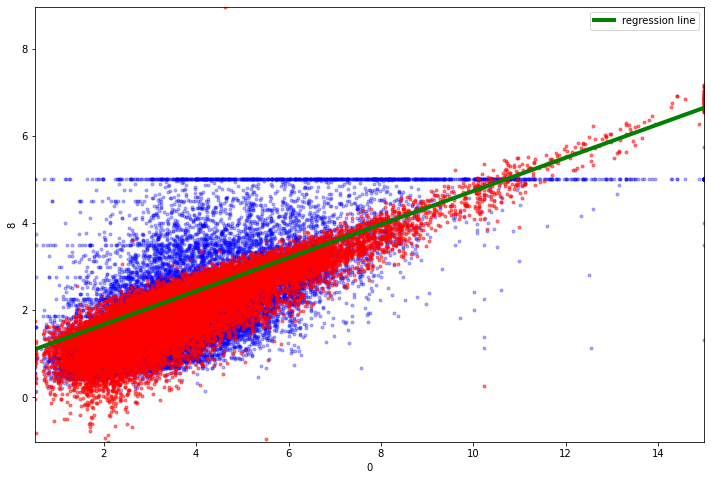

In [8]:
lr.plot(ds)